Group: Noah Little, Zach Healy, Jack Stout, Jacob Thieret, Justin Kehoe, Collyn Rouggly, Momoh Brema

## Load Data

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize data
df = pd.read_csv('athlete_events.csv', usecols=['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
                                                'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])

## Clean Data
- Convert height to feet
- Convert weight to pounds

In [85]:
# Convert data into imperial units
df['Height'] = df['Height'] / 30.48
df['Weight'] = df['Weight'] * 2.20462

## Convert athletics to Track and Field

In [86]:
df.loc[df['Sport'] == 'Athletics', 'Sport'] = 'Track and Field'

## Overview of data

In [87]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,5.905512,176.36960,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,5.577428,132.27720,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,6.069554,180.77884,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Male and Female Weight/Height Scatterplot

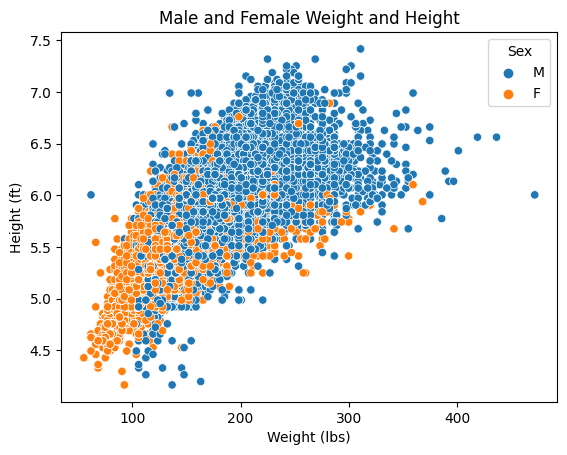

In [88]:
# Male and Female Weight and Height
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=df)
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (ft)')
plt.title('Male and Female Weight and Height')
plt.show()

As our group assumed, there was a correlation between male atheltes and a higher height or weight. An interesting thing to note about this data is that there seems to be a dividing point around 6 feet. A large majority of female atheletes were recorded under 6 feet while the male atheletes mostly recorded being over 6 feet. The weight of atheltes also correlated with the height as athletes with a smaller height also had a smaller range of possible weights. This is because a person who is shorter will have a harder time staying atheletic while also mainintg a higher weight. This data could also be affected by event as sports with shorter atheletes, such as gymnastic, require a lower weight to remain competitive.

## Atheletes per Year by Sex

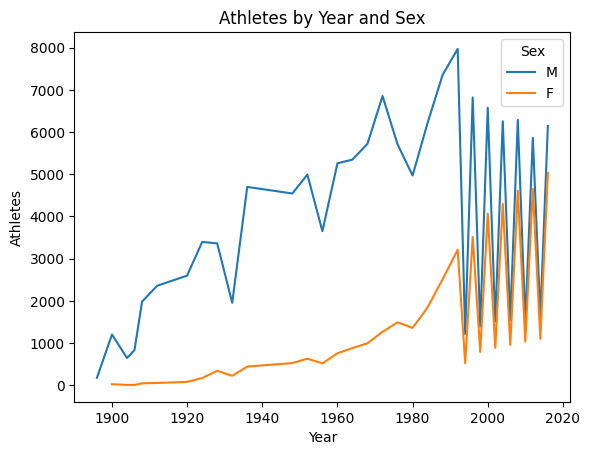

In [89]:
# Athletes by year and sex
year_sex_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
sns.lineplot(x='Year', y='ID', hue='Sex', data=year_sex_counts)
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.title('Athletes by Year and Sex')
plt.show()

We can determine that there was probably less collected data during the early 1900s, but we can see the number of male athletes was significantly higher during the 1900s. Then in the 2000s the number of female athletes increased greatly almost getting lose to the number of male athletes. This data is interesting because the number of male atheletes drops heavily right before the 21st century. After this point, there is no longer a large disparity between male and female atheletes.

## Atheletes Height by Sex

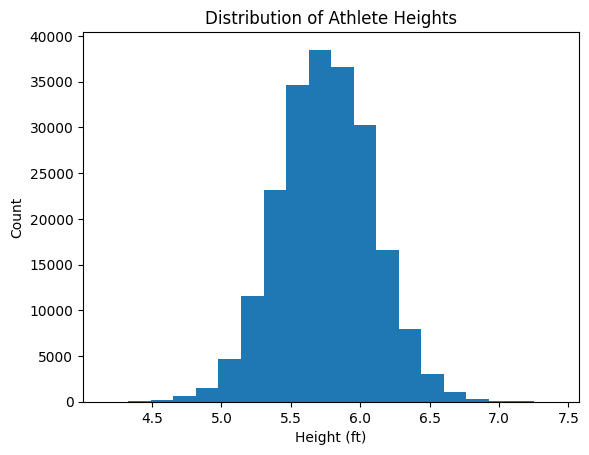

In [90]:
# Extract the Height column and convert to a NumPy array
heights = np.array(df['Height'])

# Plot a histogram of the heights
plt.hist(heights, bins=20)
plt.xlabel('Height (ft)')
plt.ylabel('Count')
plt.title('Distribution of Athlete Heights')
plt.show()

As expected from the height and weight scatterplot, the largest count of athletes is around 6 feet. Our data forms a perfect bell curve indicating a balanced dataset. It would be interesting to see this data against a general population histogram to see the difference. It would be expected that the olympic atheletes would be taller on average, but this could also be influenced by shorter athelets in certain events. 

 ## Average Height By Gender

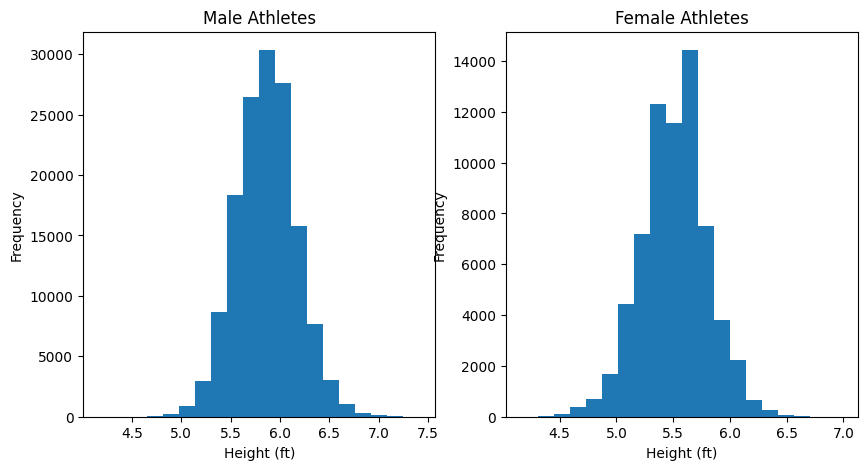

In [91]:
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

# plot histograms of height for each gender
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.hist(male_df['Height'], bins=20)
ax1.set_xlabel('Height (ft)')
ax1.set_ylabel('Frequency')
ax1.set_title('Male Athletes')
ax2.hist(female_df['Height'], bins=20)
ax2.set_xlabel('Height (ft)')
ax2.set_ylabel('Frequency')
ax2.set_title('Female Athletes')
plt.show()

Similarlly to the previous plot, both the male and female athelets exhibit a basic bell curve shape. This data may indicate the the Olympic games have a balanced set of events that provide any athelete an opportunity to compete. 

## Average number of athletes per year for each country

In [92]:
""""
counted = df.groupby(['Team', 'Year']).size()

# calculate the average number of athletes for each team over the years
avg_num_athletes = counted.groupby([]'Team').mean().nlargest(10)

# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes
avg_num_athletes.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average number of athletes')
plt.title('Average number of athletes per team over the years')
plt.show()
"""

'"\ncounted = df.groupby([\'Team\', \'Year\']).size()\n\n# calculate the average number of athletes for each team over the years\navg_num_athletes = counted.groupby([]\'Team\').mean().nlargest(10)\n\n# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes\navg_num_athletes.plot(kind=\'bar\')\nplt.xlabel(\'Country\')\nplt.ylabel(\'Average number of athletes\')\nplt.title(\'Average number of athletes per team over the years\')\nplt.show()\n'

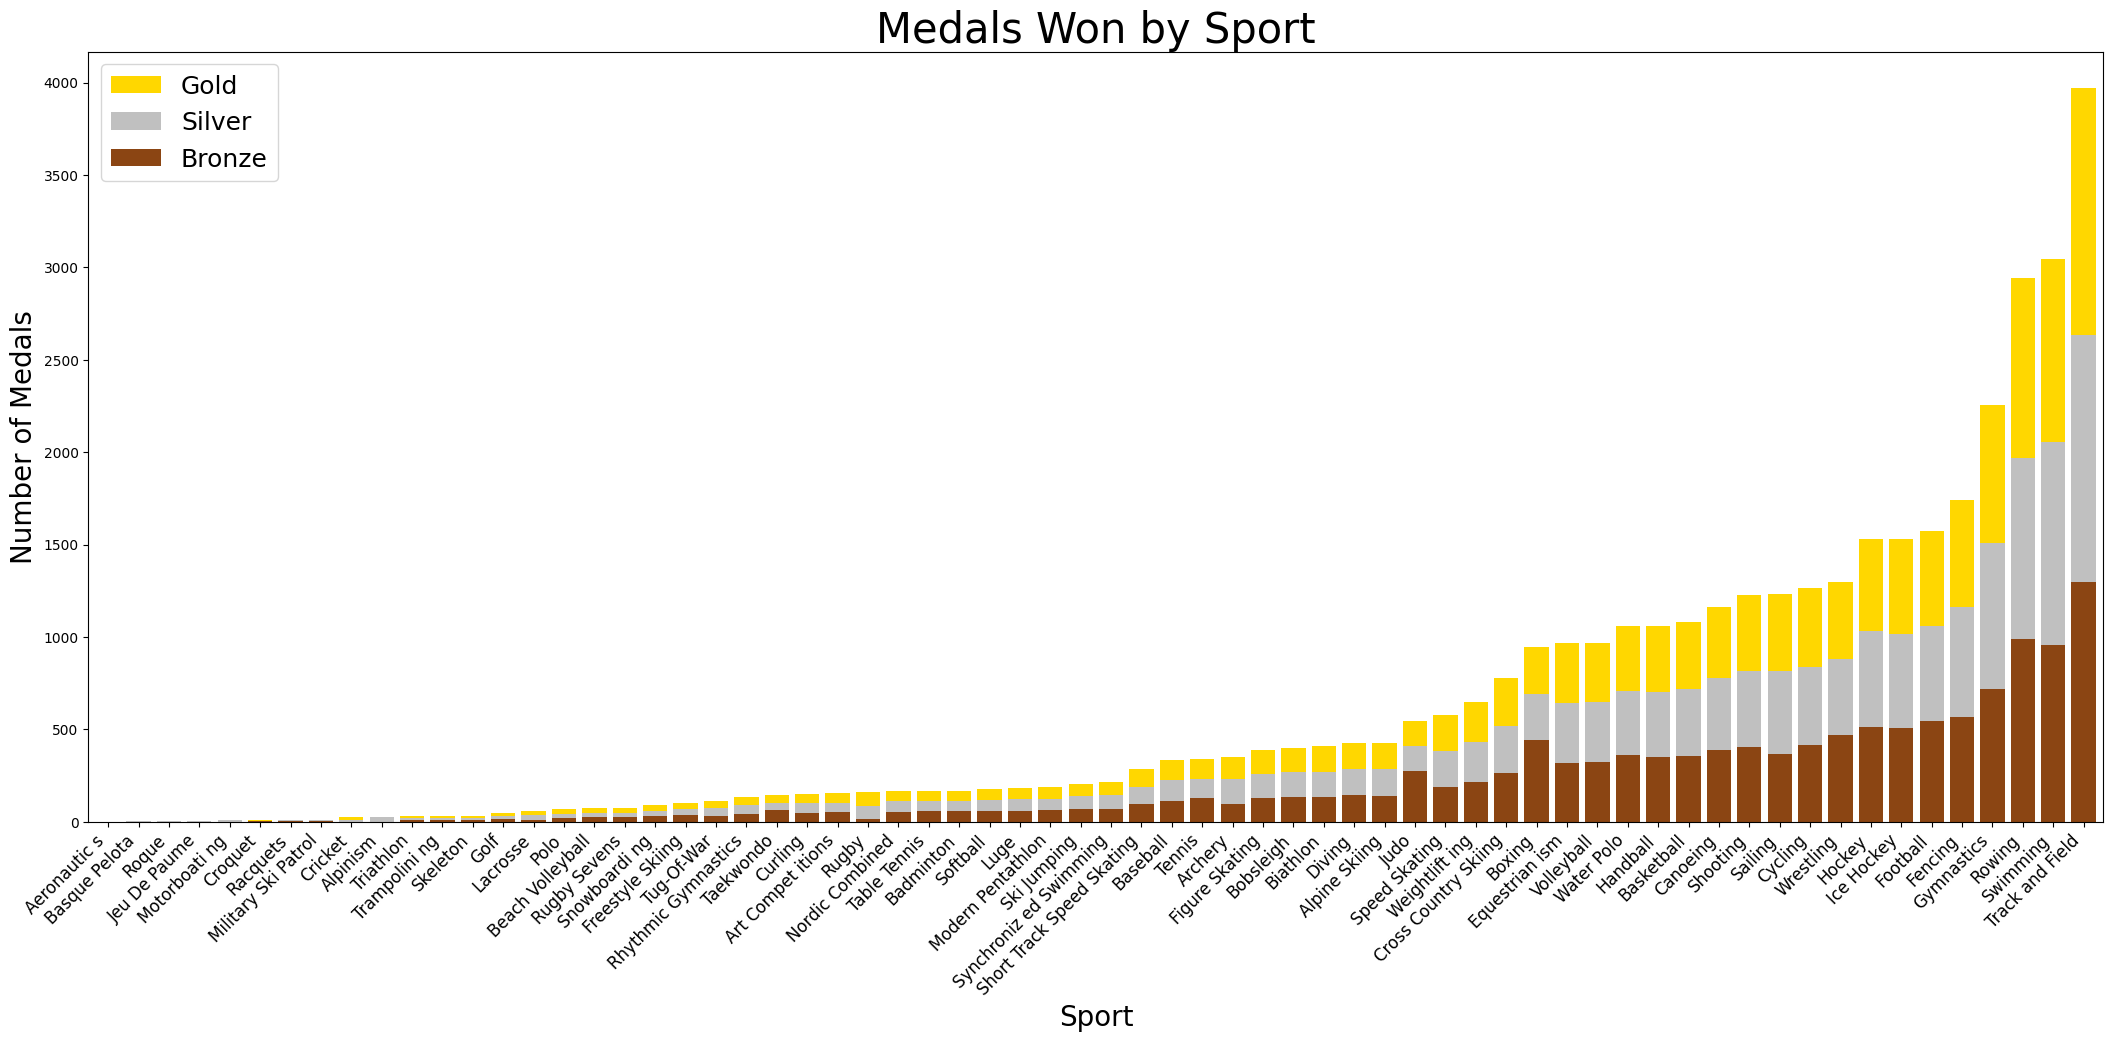

In [93]:
import textwrap

# Group the data by sport and medal type, then count the number of medals in each group
medal_count = df.groupby('Sport')['Medal'].value_counts().unstack().fillna(0)

# Calculate the total number of medals for each sport and sort them in ascending order
medal_count['Total'] = medal_count.sum(axis=1)
medal_count = medal_count.sort_values(by='Total')
medal_count = medal_count[medal_count['Total'] != 0]
del medal_count['Total']

# Create a stacked bar plot
ax = medal_count.plot(kind='bar', stacked=True, figsize=(26, 10), width=0.8, color=['saddlebrown', 'silver', 'gold'])

# Set the title and labels
ax.set_title('Medals Won by Sport', fontsize=30)
ax.set_xlabel('Sport', fontsize=20)
ax.set_ylabel('Number of Medals', fontsize=20)

# Format x-axis labels
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in medal_count.index]
ax.set_xticklabels(wrapped_sports, rotation=45, ha='right', fontsize=12)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Bronze', 'Silver', 'Gold']
ax.legend(reversed(handles), reversed(labels), loc='upper left', fontsize=18)

# Show the plot

plt.show()

The above graph shows a graphical display of the medals won by each olympic sport. As our group expected, the Track and Field events had the largest number of medals awarded. This is becauase this is a large encompassing event that contains many smaller events within it. This leads to it having the tallest bar. 

## Medal Counts by Country

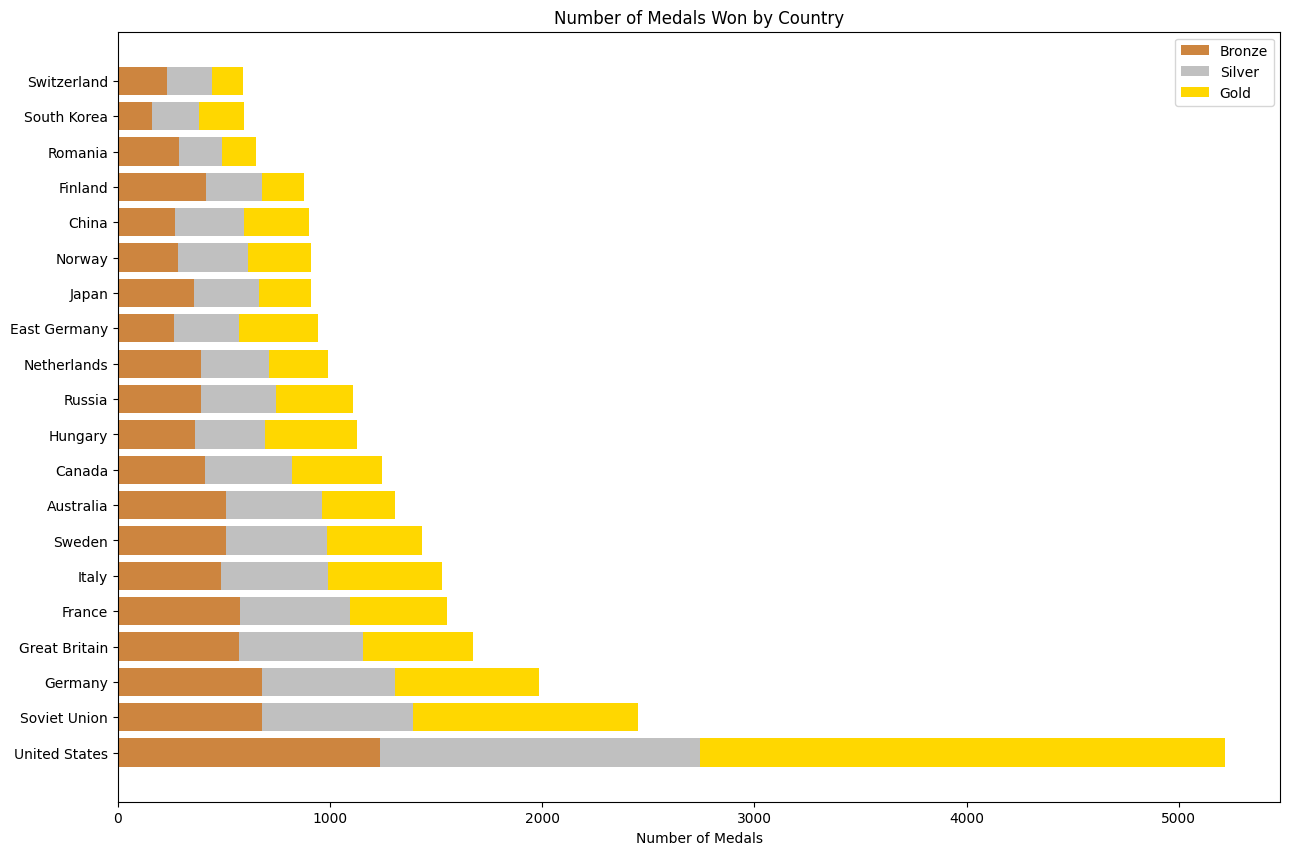

In [94]:
# Separate medal counts by country
gold = df[df['Medal'] == 'Gold'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Gold'})
silver = df[df['Medal'] == 'Silver'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Silver'})
bronze = df[df['Medal'] == 'Bronze'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Bronze'})

# Merge dataframes
medals = pd.merge(bronze, silver, on='Team', how='outer')
medals = pd.merge(medals, gold, on='Team', how='outer')
medals = medals.fillna(0)
medals['Total'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

# Sort medals
medals = medals.sort_values('Total', ascending=False).head(20)

# Create bar plot
plt.figure(figsize=(15, 10))
plt.barh(medals['Team'], medals['Bronze'], color='peru', label='Bronze')
plt.barh(medals['Team'], medals['Silver'], left=medals['Bronze'], color='silver', label='Silver')
plt.barh(medals['Team'], medals['Gold'], left=medals['Bronze'] + medals['Silver'], color='gold', label='Gold')
plt.xlabel('Number of Medals')
plt.title('Number of Medals Won by Country')
plt.legend()
plt.show()


This plot shows the amount of medals won by each country. For brevity, only the top 20 medal-earning countries were shown. As can be seen above, the US leads all other countries by a large margin. Interestingly, the US has more gold medals than many other countries have in total medals. As can be seen in the data, more developed countries tend to perform better in the Olympics. This is because they have access to better resources and athletes that can compete for their country. Interesting to note that the Soviet Union is still second even after falling in 1991.

# Medal Count Per Sport for Each Country Tree Map

In [95]:
import plotly.express as px

# Filter the dataset to only include medal winners
medals_df = df.dropna(subset=['Medal'])

# Calculate the medal count by country and sport
medal_counts = medals_df.groupby(['NOC', 'Sport'])['Medal'].count().reset_index()

# Rename columns for better readability in the treemap
medal_counts.rename(columns={'NOC': 'Country', 'Sport': 'Sport', 'Medal': 'Medal_Count'}, inplace=True)

# Create the treemap
fig = px.treemap(medal_counts, path=['Country', 'Sport'], values='Medal_Count',
                 title='Medal Counts by Sport for Each Country',
                 color_continuous_scale='viridis',
                 color='Medal_Count',
                 custom_data=['Sport', 'Medal_Count'])

# Update hover and text templates to show the number of medals for each sport
fig.update_traces(hovertemplate='Country: %{label}<br>Sport: %{customdata[0]}<br>Medal Count: %{customdata[1]}',
                  texttemplate='%{customdata[0]}: %{customdata[1]}')

fig.update_layout(height=1000)
fig.show()


In this plot, we display medals per country while also showing what sport they came from. This plot provides us a deeper analysis into a country's performance because we can extrapolate a county's focus by their medal counts. For example, The Soviet Union placed a large emphasis on the gymnastics event as they earned 288 medals for that event. This was their largest medal earning event and it is probable that it was the event they cared about winning the most. Another interesting thing to analysis is countries winning in events they are known for. Canada, commonly known for playing ice hockey, earned the largest portion of their medals for the ice hockey event. Using this plot, we can make deep analysis for many countries.

In [96]:
# Calculate the medal count by team and sport
medal_counts = medals_df.groupby(['Team', 'Sport'])['Medal'].count().reset_index()
medal_counts.rename(columns={'Team': 'Team', 'Sport': 'Sport', 'Medal': 'Medal_Count'}, inplace=True)
top_teams = medal_counts.groupby('Team')['Medal_Count'].sum().sort_values(ascending=False).head(10)
print(top_teams)

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal_Count, dtype: int64


In [97]:
top_sports = medal_counts.groupby('Sport')['Medal_Count'].sum().sort_values(ascending=False).tail(10)
print(top_sports)

Sport
Alpinism               25
Cricket                24
Military Ski Patrol    12
Racquets               10
Croquet                 8
Motorboating            7
Jeu De Paume            3
Roque                   3
Basque Pelota           2
Aeronautics             1
Name: Medal_Count, dtype: int64


## Country Medals by Decade Heatmap

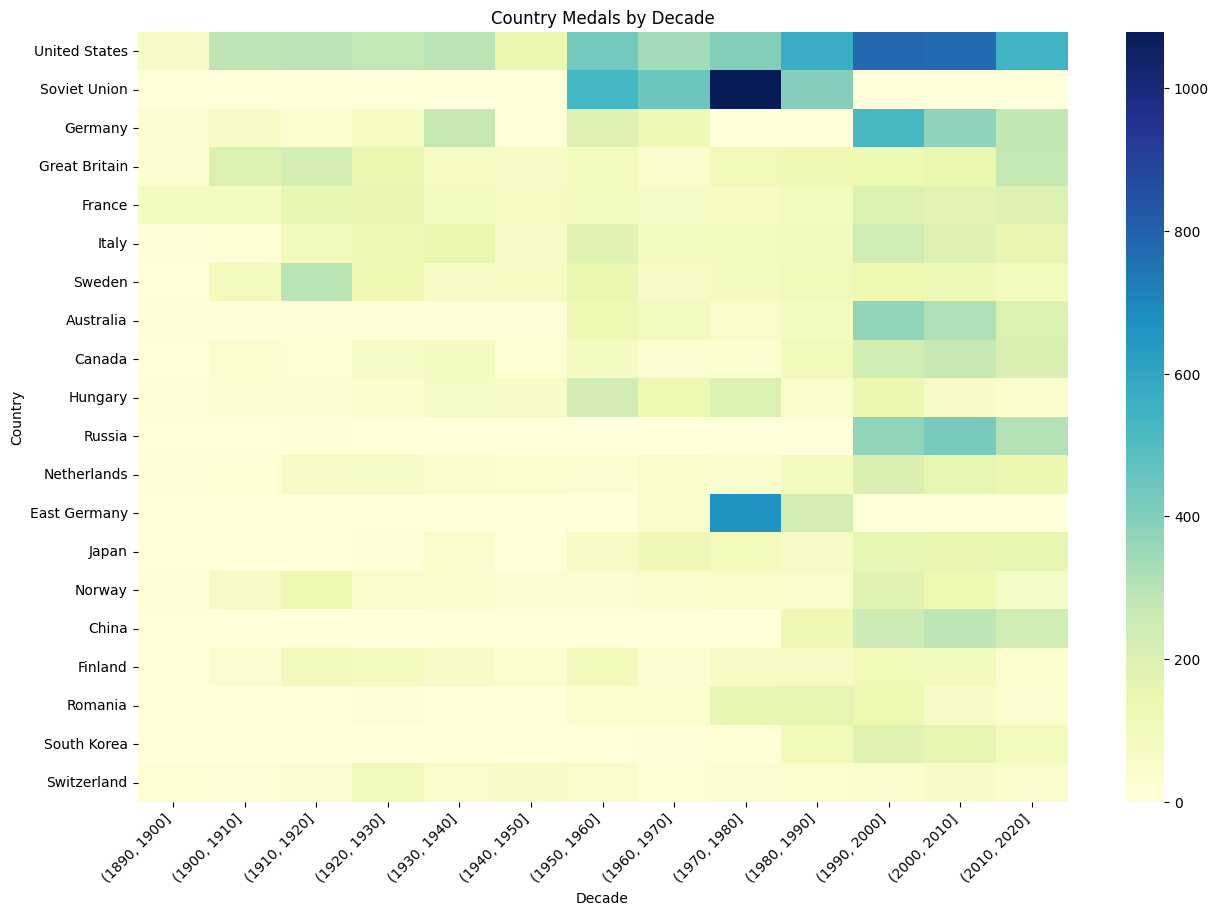

In [98]:
bins = np.arange(1890, 2021, 10)
medals_by_country_decade = df.groupby(['Team', pd.cut(df['Year'], bins=bins)])['Medal'].count().reset_index().pivot(index='Team', columns='Year', values='Medal')
medals = df.groupby('Team')['Medal'].count().reset_index().sort_values('Medal', ascending=False).head(20)

medals_by_country_decade = medals_by_country_decade.loc[medals['Team'], :]

# Create heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(medals_by_country_decade, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Decade')
plt.ylabel('Country')
plt.title('Country Medals by Decade')
plt.show()


The heatmap plot provides us with information relating to when each country won their medals. Using this plot, we can analysis what world events may have affected each country at the Olympic Games. The Unites States has consistently won many medals at the Olympic Games as denoted by the darker coloring for each decade. This rate has increased after the 21st century. All countries saw an increase in medals after the 21st century. This could be caused by either more data being collected recently, or the Olympics may have increased the number of events during this time. Looking at the heatmap, we can make assumptions about a country's performance. For example, East Germany and the Soviet Union performed extremely well during the 1970s. This can largely be attributed to the world events during this time.

## Average and Maximum Height By Gender Per Sport

C:\Users\jacob\AppData\Local\Temp\ipykernel_14364\3343109744.py:4: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.

C:\Users\jacob\AppData\Local\Temp\ipykernel_14364\3343109744.py:22: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



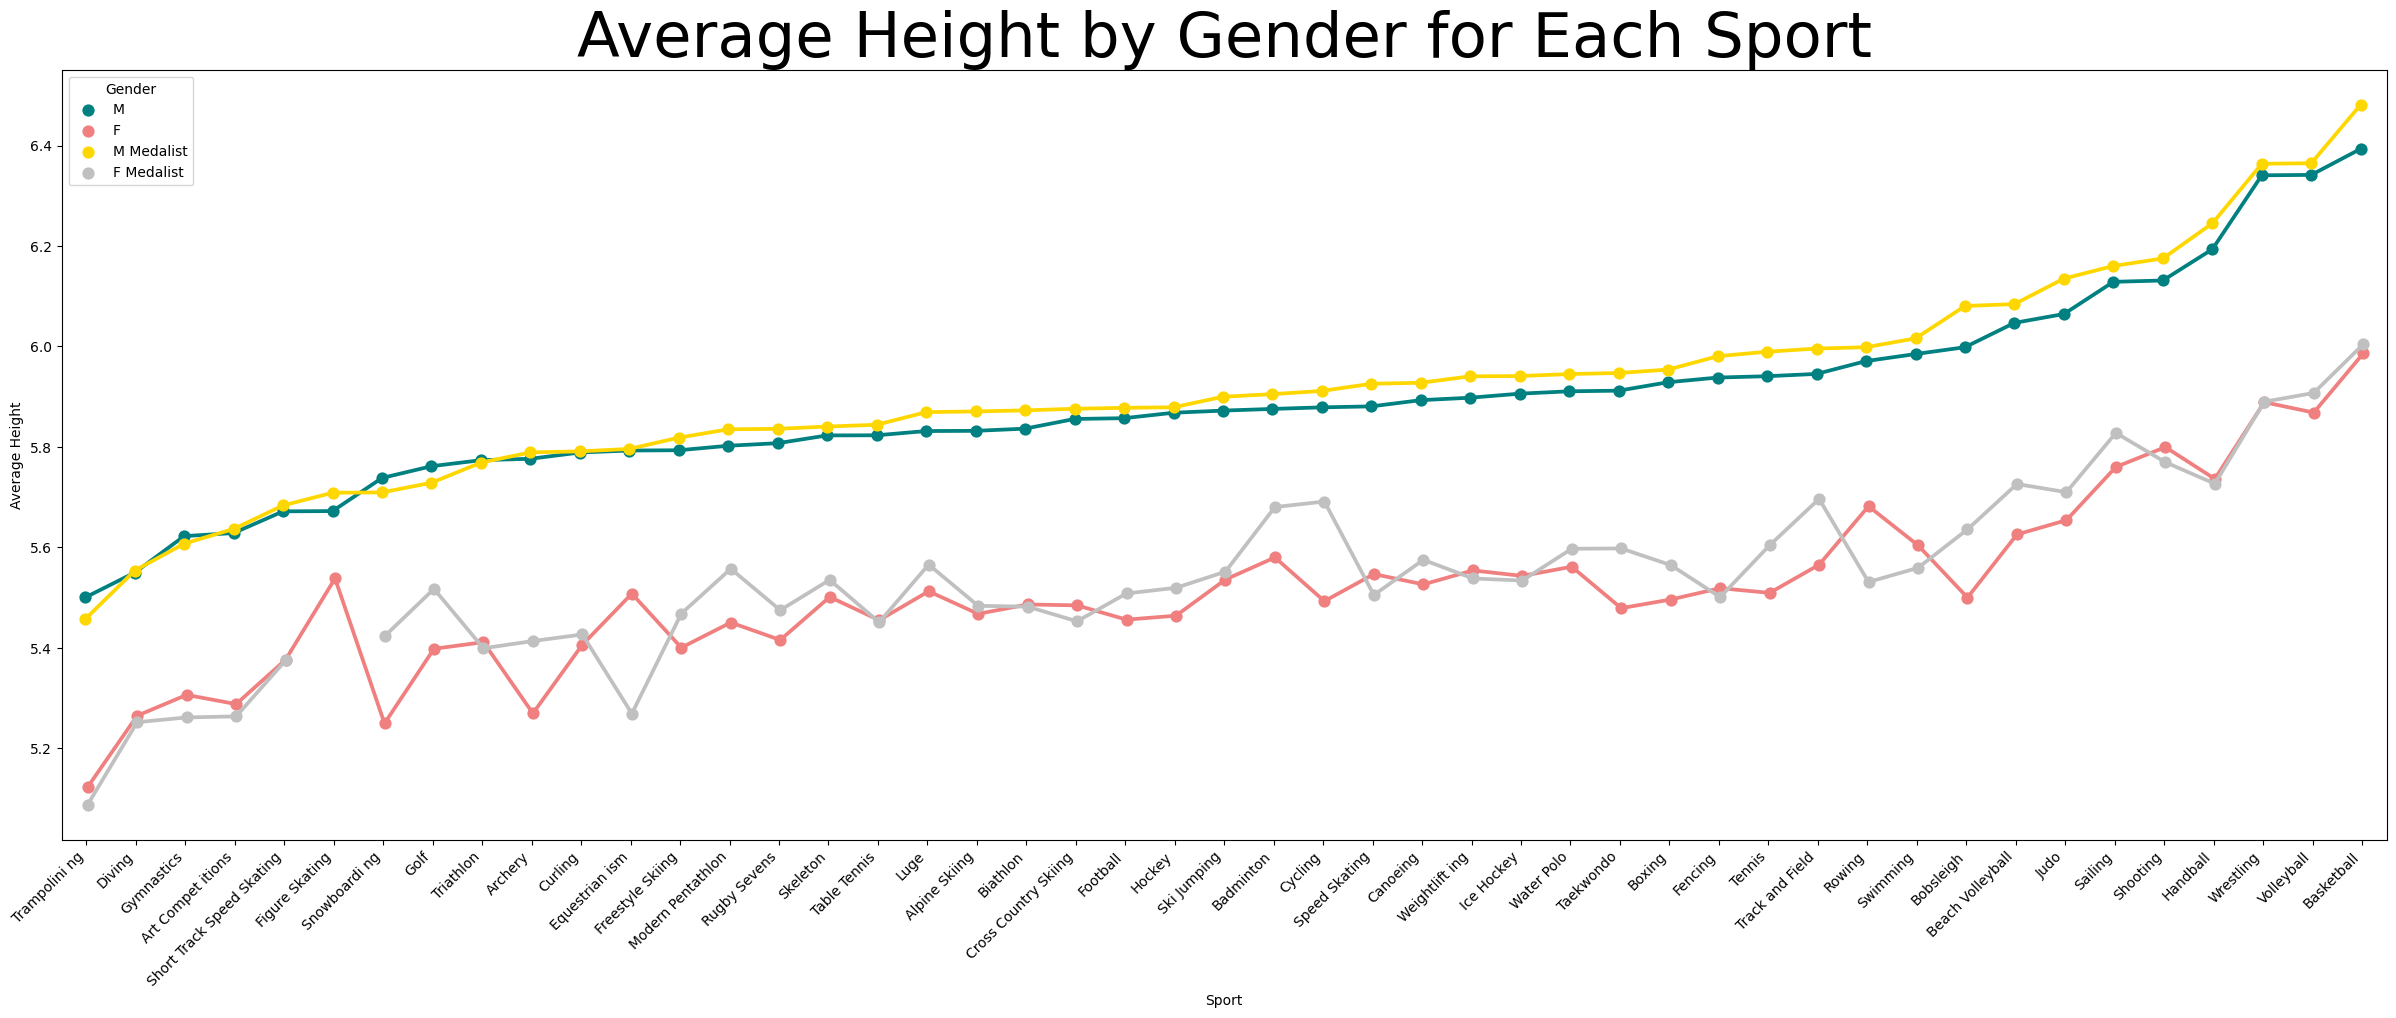

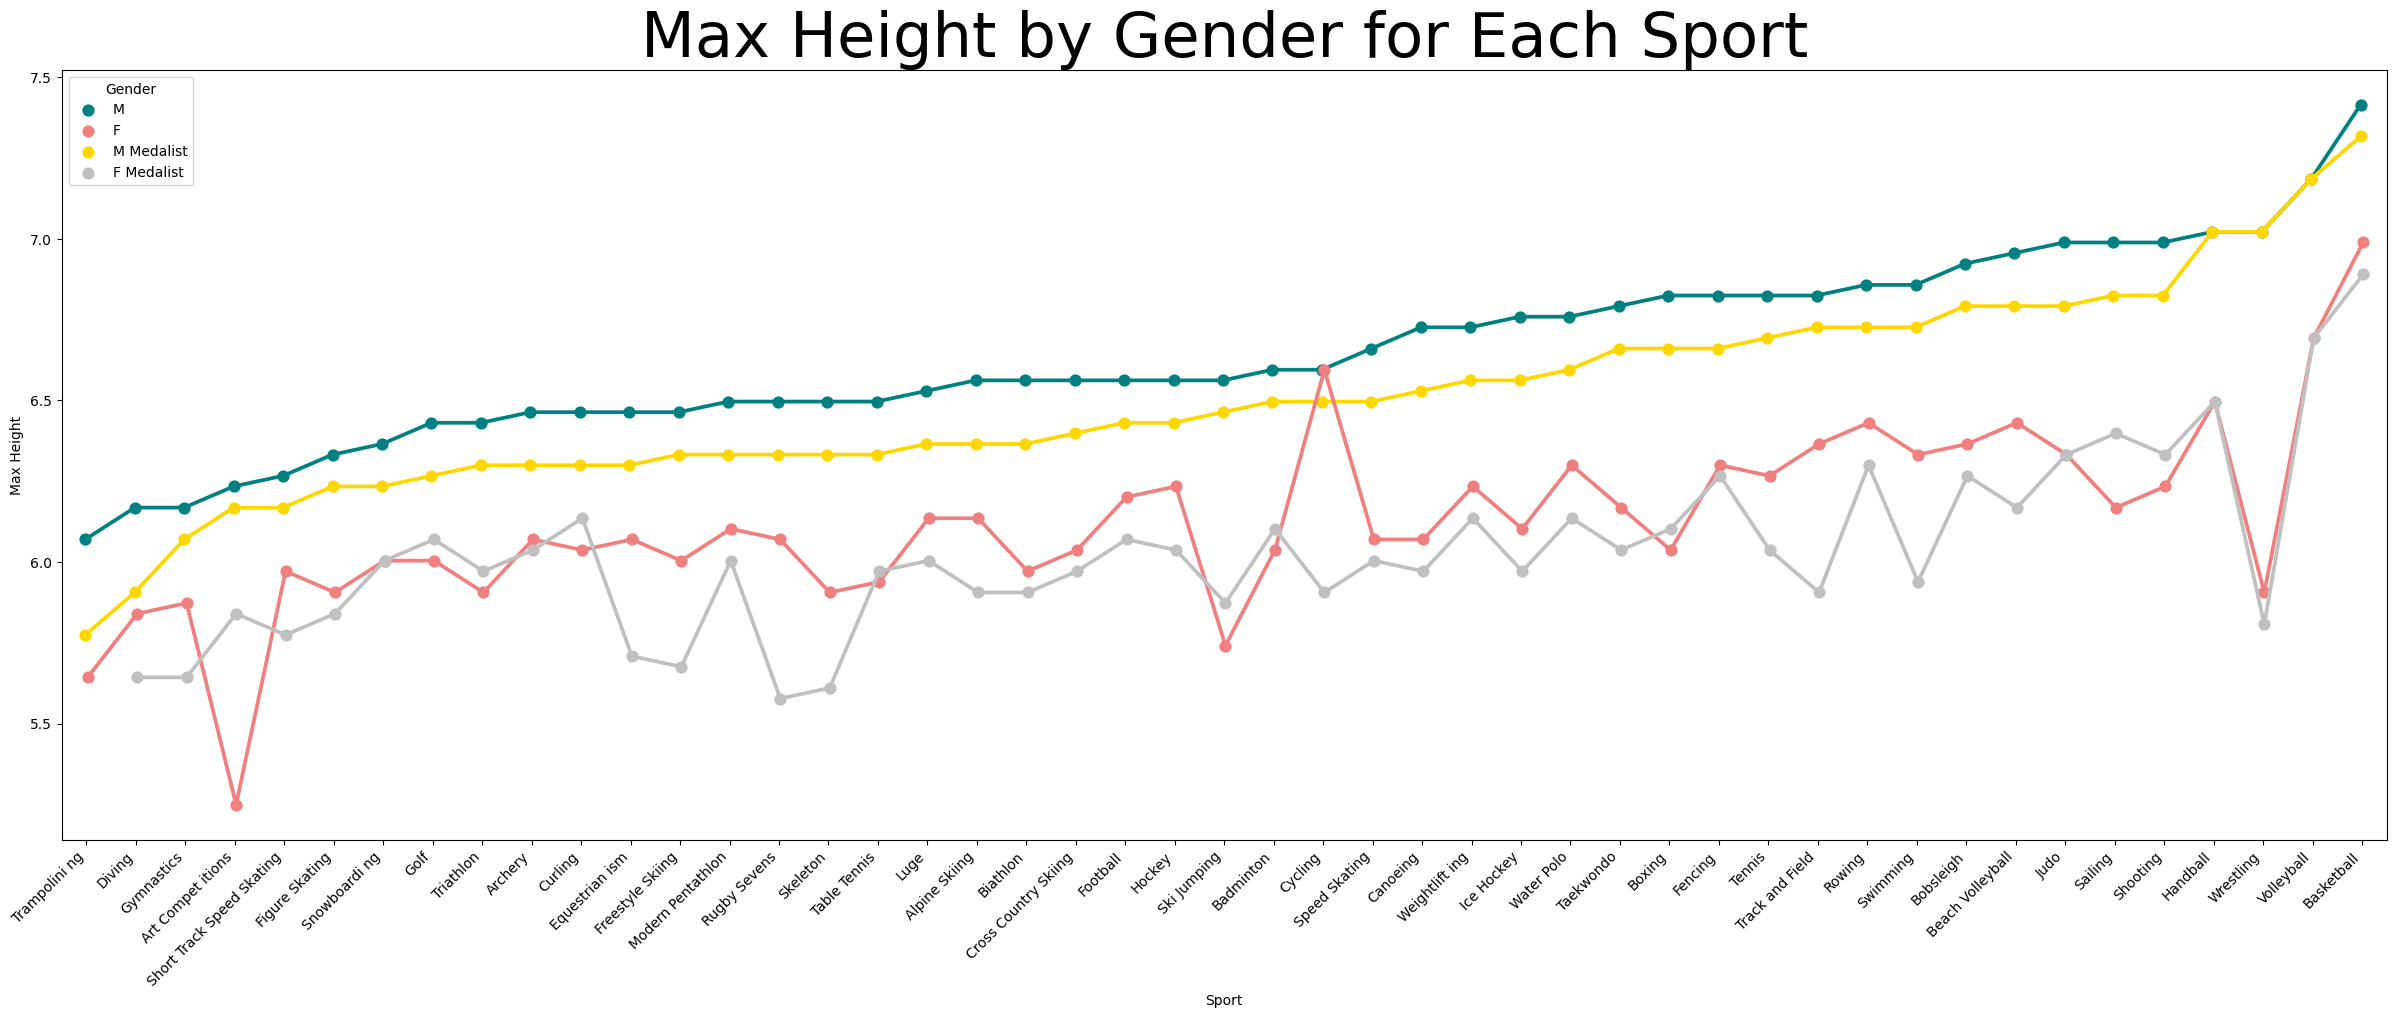

In [99]:
import textwrap

df = df.dropna(subset=['Height'])
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()

# Sort by average male height
gb_sport_sex.sort_values(by=['Sex', 'Height'], ascending=[False, True], inplace=True)

max_height_sport_sex = df.groupby(['Sport', 'Sex'])['Height'].max().reset_index()

# Sort by max male height
max_height_sport_sex.sort_values(by=['Sex', 'Height'], ascending=[False, True], inplace=True)

# Filter out sports with both genders
filtered_sports = [sport for sport in max_height_sport_sex['Sport'].unique() if all(gender in max_height_sport_sex[max_height_sport_sex['Sport'] == sport]['Sex'].values for gender in ['M', 'F'])]

custom_palette = {'M': 'teal', 'F': 'lightcoral'}
custom_palette_two = {'M Medalist': 'gold', 'F Medalist': 'silver'}

# Filter dataframe to only include gold, silver, and bronze medalists
medalists = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
gb_sport_sex_medalists = medalists.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()

gb_sport_sex_medalists_height = medalists.groupby(['Sport', 'Sex'])['Height'].max().reset_index()
gb_sport_sex_medalists_height.sort_values(by=['Sex', 'Height'], ascending=[False, True], inplace=True)

gb_sport_sex_medalists.sort_values(by=['Sex', 'Height'], ascending=[False, True], inplace=True)

gb_sport_sex_medalists['Sex'] = gb_sport_sex_medalists['Sex'].map({'M': 'M Medalist', 'F': 'F Medalist'})
gb_sport_sex_medalists_height['Sex'] = gb_sport_sex_medalists_height['Sex'].map({'M': 'M Medalist', 'F': 'F Medalist'})

# Plot Average Height
plt.figure(figsize=(30, 10))
sns.pointplot(data=gb_sport_sex[gb_sport_sex['Sport'].isin(filtered_sports)], x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)
sns.pointplot(data=gb_sport_sex_medalists[gb_sport_sex_medalists['Sport'].isin(filtered_sports)], x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette_two)

# Customize the plot
plt.title('Average Height by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Average Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in filtered_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()

# Plot Max Height
plt.figure(figsize=(30, 10))
sns.pointplot(data=max_height_sport_sex[max_height_sport_sex['Sport'].isin(filtered_sports)], x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)
sns.pointplot(data=gb_sport_sex_medalists_height[gb_sport_sex_medalists_height['Sport'].isin(filtered_sports)], x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette_two)


# Customize the plot
plt.title('Max Height by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Max Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in filtered_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()

In these two plots, we can see the average and max height for each sport. This data is split into male and female athletes to show the differences between the two events. As expected, the male athletes reported taller heights in every event. One interesting point of the data is the max height of cyclists. In this event, male and female athletes reported the same max height. This could be caused by height being a non-factor in this sport. Looking at this data, we can also determine the sports where weight matters the most. According the graphs, these events include basketball, volleyball, and wrestling for male athletes and basketball, volleyball and cycling for female athletes. We also ploted the average height of a medalist in a specific event. It was interesting to note the on average, the medalist for an event was taller than the average athlete.

## Average and Maximum Weight by Gender Per Sport

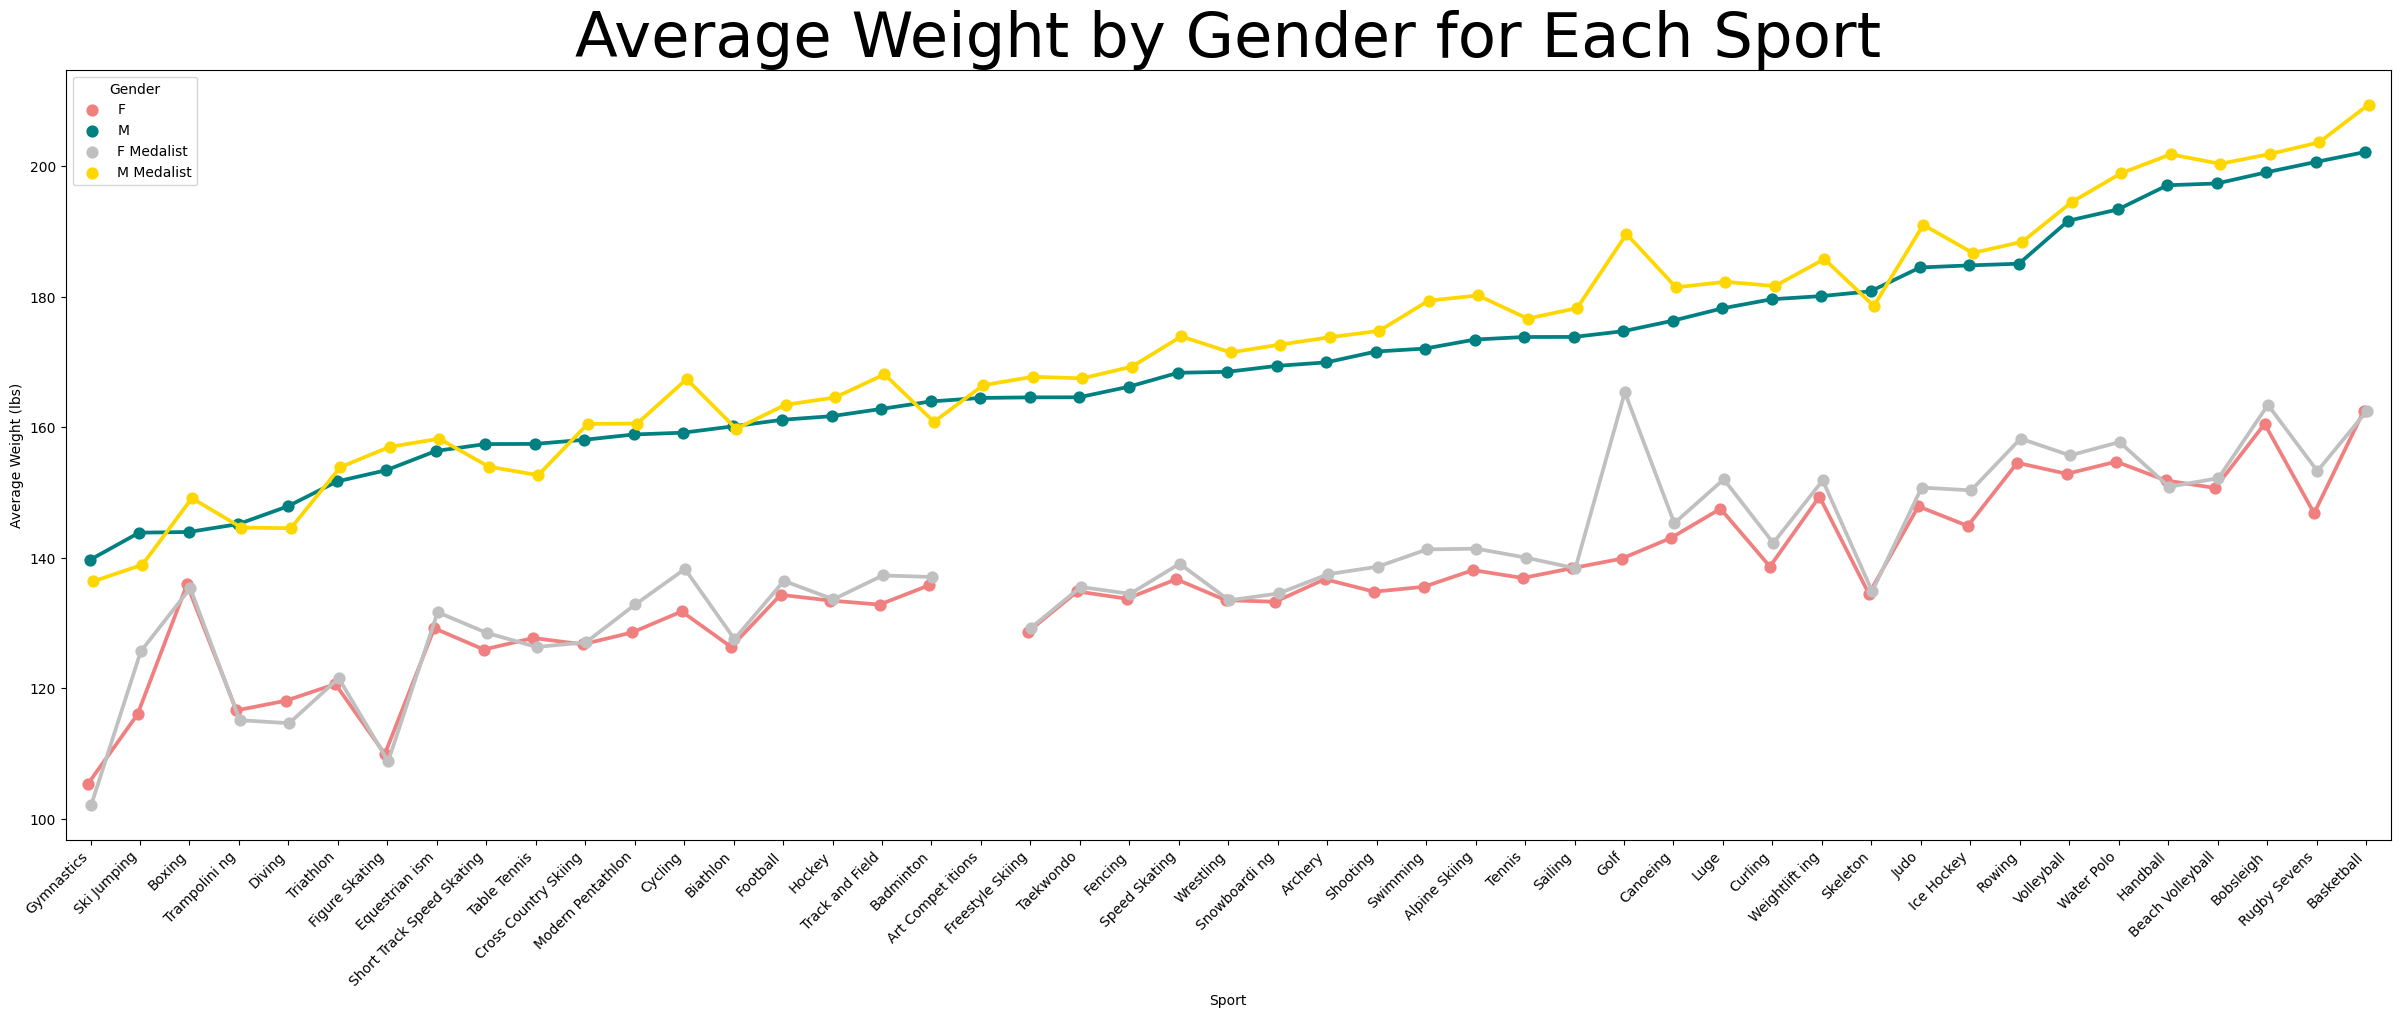

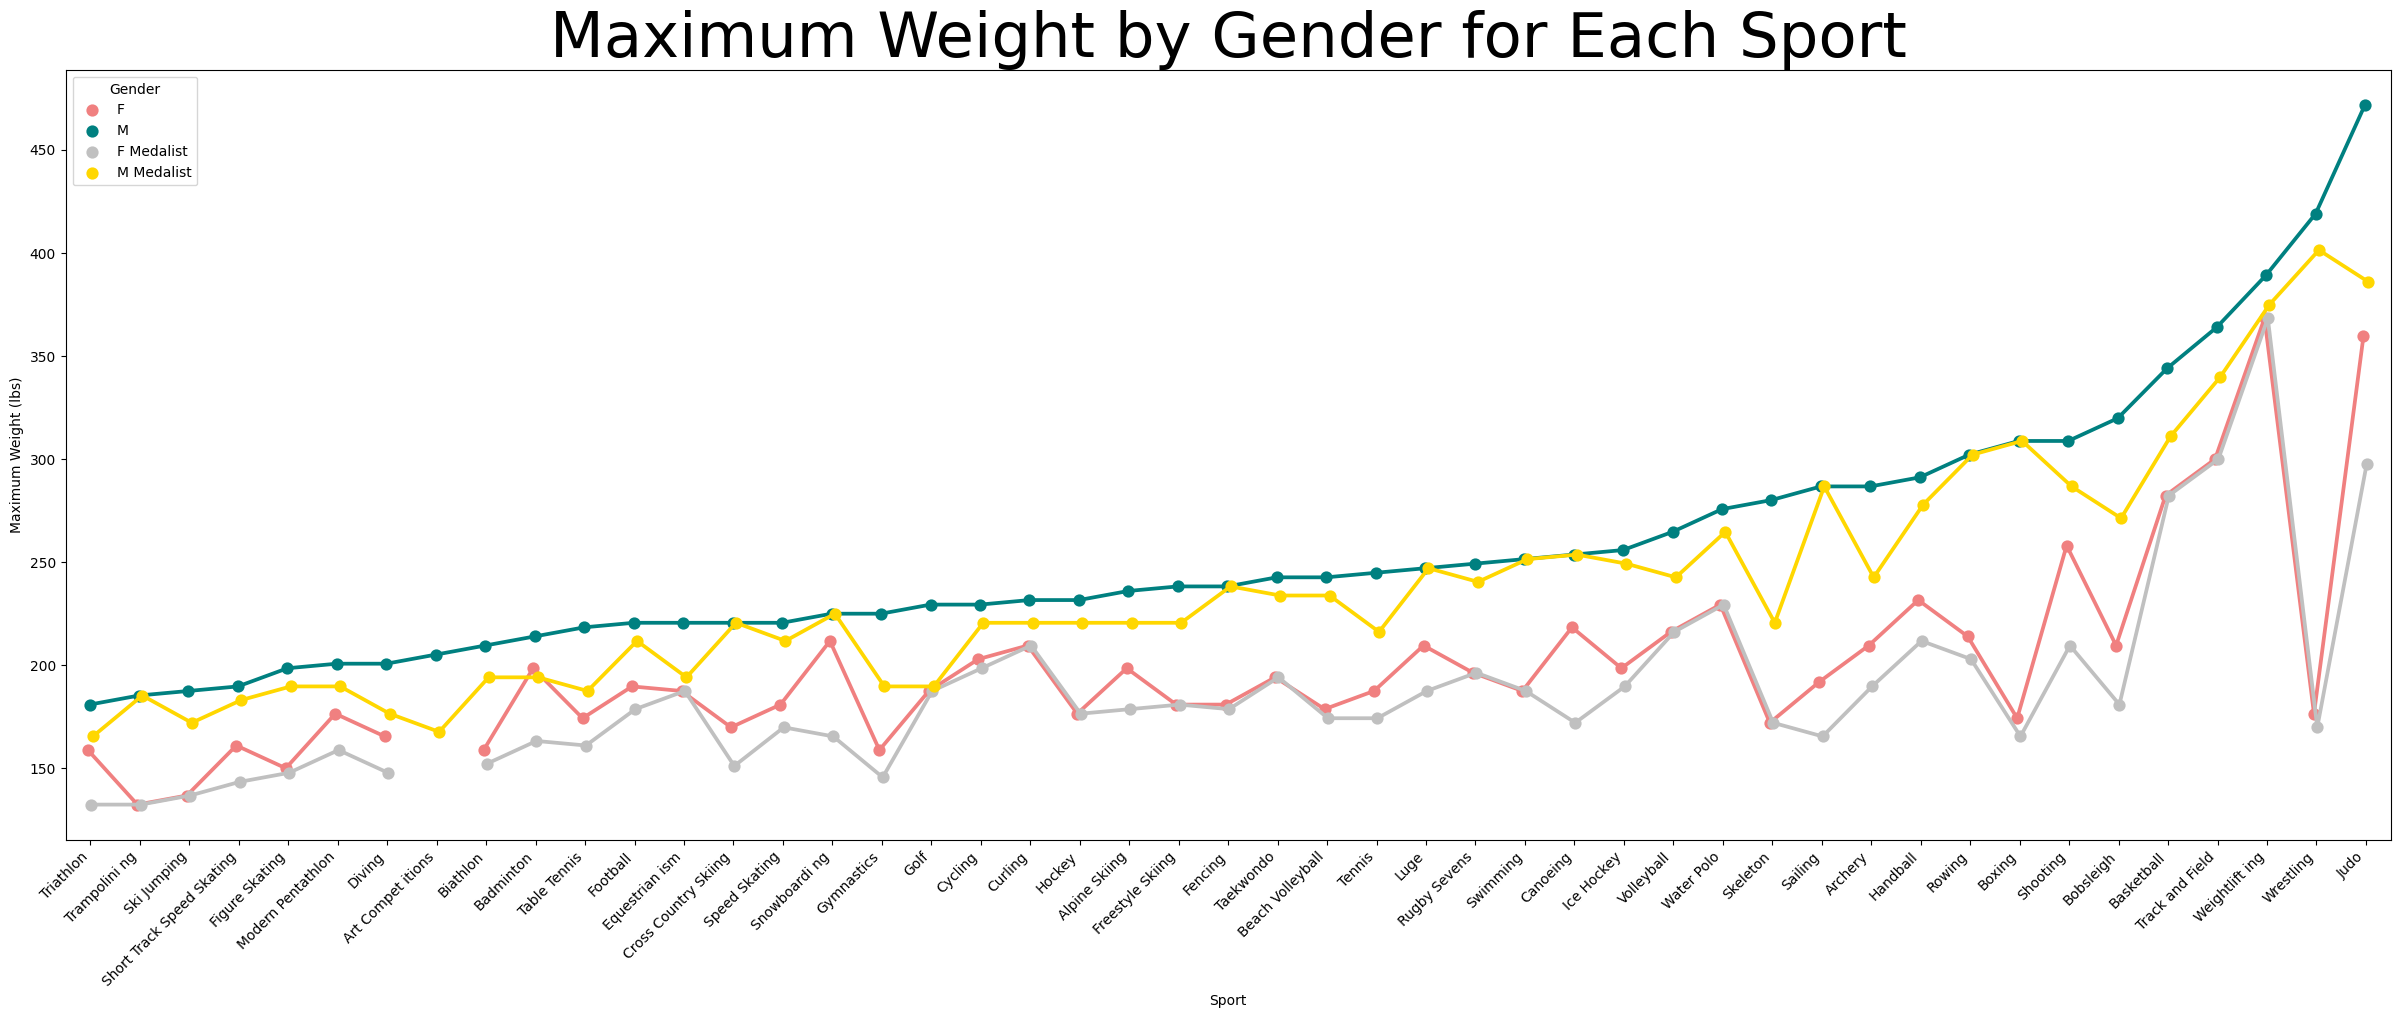

In [105]:
import textwrap

no_weights = df.dropna(subset=['Weight'])
gb_sport_sex = df.groupby(['Sport', 'Sex']).agg({'Weight': ['mean', 'max']}).reset_index()
gb_sport_sex.columns = ['Sport', 'Sex', 'Avg_Weight', 'Max_Weight']

sports_with_both_genders = gb_sport_sex.groupby('Sport').filter(lambda x: len(x) == 2)['Sport'].unique()
gb_sport_sex = gb_sport_sex[gb_sport_sex['Sport'].isin(sports_with_both_genders)]

medalists = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
gb_sport_sex_medalists = medalists.groupby(['Sport', 'Sex']).agg({'Weight': ['mean', 'max']}).reset_index()
gb_sport_sex_medalists.columns = ['Sport', 'Sex', 'Avg_Weight_Medalist', 'Max_Weight_Medalist']
gb_sport_sex_medalists['Sex'] = gb_sport_sex_medalists['Sex'].map({'M': 'M Medalist', 'F': 'F Medalist'})

gb_sport_sex_all = gb_sport_sex.melt(id_vars=['Sport', 'Sex'], value_vars=['Avg_Weight', 'Max_Weight']).rename(columns={'variable': 'Metric', 'value': 'Weight'})
gb_sport_sex_medalists_all = gb_sport_sex_medalists.melt(id_vars=['Sport', 'Sex'], value_vars=['Avg_Weight_Medalist', 'Max_Weight_Medalist']).rename(columns={'variable': 'Metric', 'value': 'Weight'})

merged_data = pd.concat([gb_sport_sex_all, gb_sport_sex_medalists_all], ignore_index=True)

custom_palette = {'M': 'teal', 'F': 'lightcoral', 'M Medalist': 'gold', 'F Medalist': 'silver'}

# Sort sports by average male weight
sorted_sports_avg = gb_sport_sex[gb_sport_sex['Sex'] == 'M'].sort_values(by='Avg_Weight')['Sport'].values
merged_data['Sport'] = merged_data['Sport'].astype(pd.CategoricalDtype(categories=sorted_sports_avg, ordered=True))

# Plot Average Weight
plt.figure(figsize=(30, 10))
ax = sns.pointplot(data=merged_data[merged_data['Metric'].isin(['Avg_Weight', 'Avg_Weight_Medalist'])], x='Sport', y='Weight', hue='Sex', dodge=True, palette=custom_palette)

plt.title('Average Weight by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Average Weight (lbs)')
plt.xticks(rotation=45)
wrapped_sports_avg = [' '.join(textwrap.wrap(sport, 10)) for sport in sorted_sports_avg]
ax.set_xticklabels(wrapped_sports_avg, ha='right')
plt.legend(title='Gender')

plt.show()

# Sort sports by max male weight
sorted_sports_max = gb_sport_sex[gb_sport_sex['Sex'] == 'M'].sort_values(by='Max_Weight')['Sport'].values
merged_data['Sport'] = merged_data['Sport'].astype(pd.CategoricalDtype(categories=sorted_sports_max, ordered=True))

# Plot Max Weight
plt.figure(figsize=(30, 10))
ax = sns.pointplot(data=merged_data[merged_data['Metric'].isin(['Max_Weight', 'Max_Weight_Medalist'])], x='Sport', y='Weight', hue='Sex', dodge=True, palette=custom_palette)

plt.title('Maximum Weight by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Maximum Weight (lbs)')
plt.xticks(rotation=45)
wrapped_sports_max = [' '.join(textwrap.wrap(sport, 10)) for sport in sorted_sports_max]
ax.set_xticklabels(wrapped_sports_max, ha='right')
plt.legend(title='Gender')

plt.show()



In these two plots, we can see the average and max weight for each sport. This data is split into male and female athletes to show the differences between the two events. As expected, the male athletes reported higher weights in every event.  According the the graphs, these events include judo, wrestling, and weightlifting for male athletes and judo, weightlifting, and track and field for female athletes.

## Treemap of Post-Soviet countries Individual Sport Performance

In [ ]:
import plotly.express as px

# Filter the data for post-Soviet countries
post_soviet_nocs = ['ARM', 'AZE', 'BLR', 'EST', 'GEO', 'KAZ', 'KGZ', 'LAT', 'LTU', 'MDA', 'RUS', 'TJK', 'TKM', 'UKR', 'UZB']
post_soviet_df = df[df['NOC'].isin(post_soviet_nocs)]

# Filter the dataset to only include medal winners
medals_df = post_soviet_df.dropna(subset=['Medal'])

# Calculate the medal count by country and sport
medal_counts = medals_df.groupby(['NOC', 'Sport'])['Medal'].count().reset_index()

# Rename columns for better readability in the treemap
medal_counts.rename(columns={'NOC': 'Country', 'Sport': 'Sport', 'Medal': 'Medal_Count'}, inplace=True)

# Create the treemap
fig = px.treemap(medal_counts, path=['Country', 'Sport'], values='Medal_Count',
                 title='Medal Counts by Sport for Each Post-Soviet Union Country',
                 color_continuous_scale='viridis',
                 color='Medal_Count',
                 custom_data=['Sport', 'Medal_Count'])

# Update hover and text templates to show the number of medals for each sport
fig.update_traces(hovertemplate='Country: %{label}<br>Sport: %{customdata[0]}<br>Medal Count: %{customdata[1]}',
                  texttemplate='%{customdata[0]}: %{customdata[1]}')

fig.update_layout(height=1000)
fig.show()

To provide a deeper analysis into the Soviet Union's performance in the Olympic Games, our group created a second treemap. This plot shows the performance of each post-Soviet country for various events. Out of the countries, Russia performed the best, winning a majority of the medals. Their best event was track and field, followed by gymnastics. The second best performing country was Ukraine, earning a decent amount of medals in both track and field and gymnastics. It is interesting that these two countries earned most of their medals in the same two events.

## Bar Graphs of Individual Countries Performance Per Sport

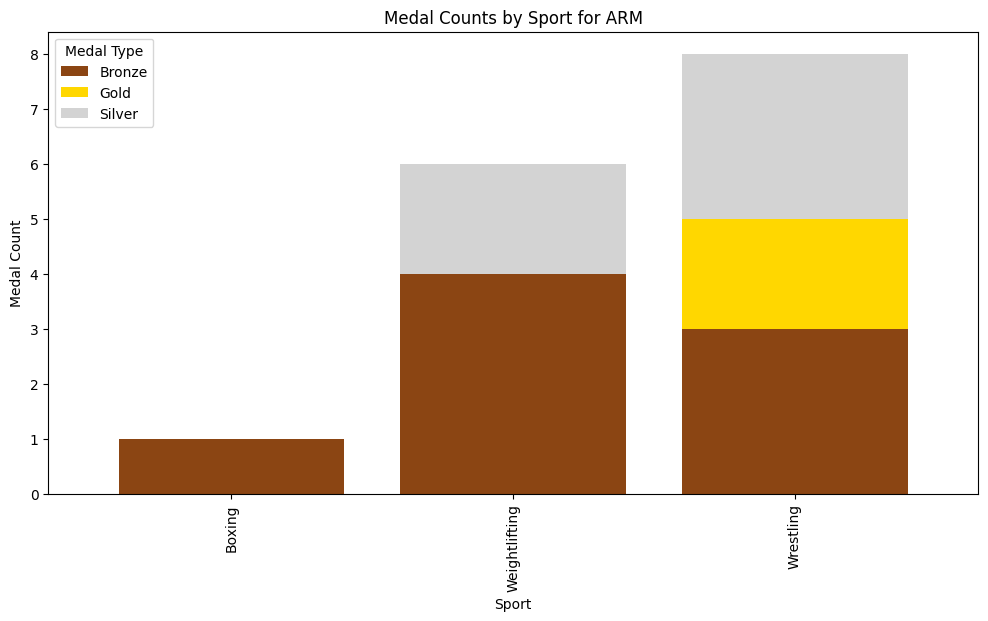

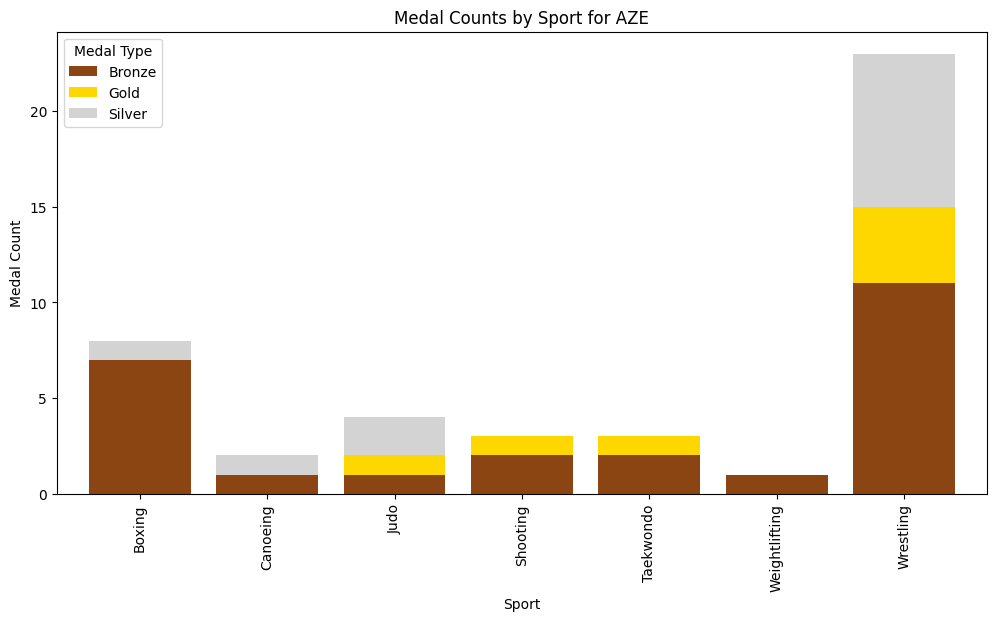

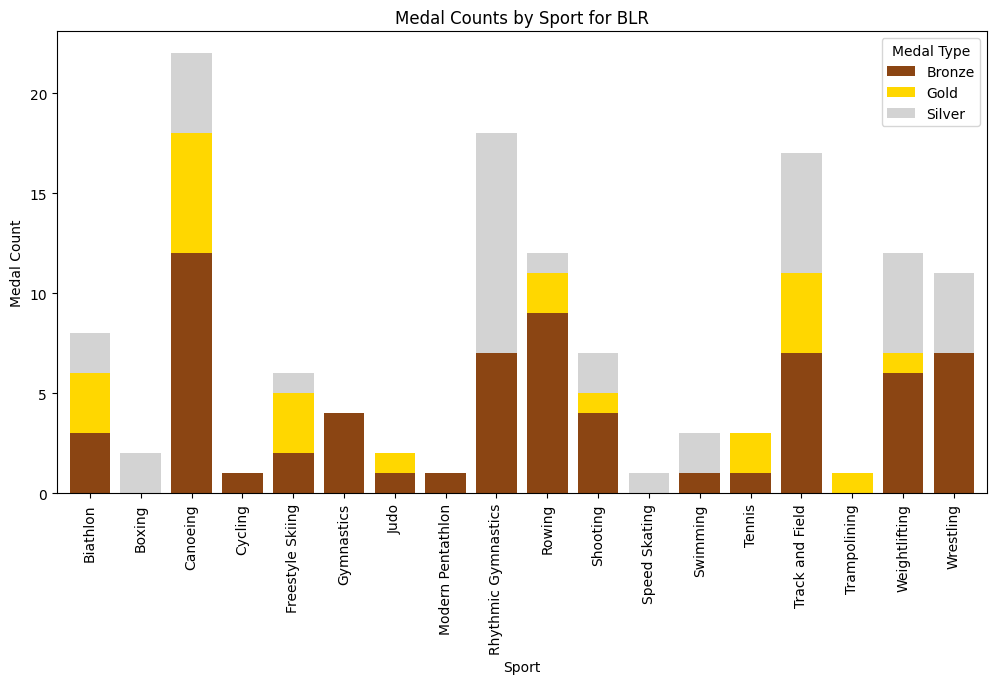

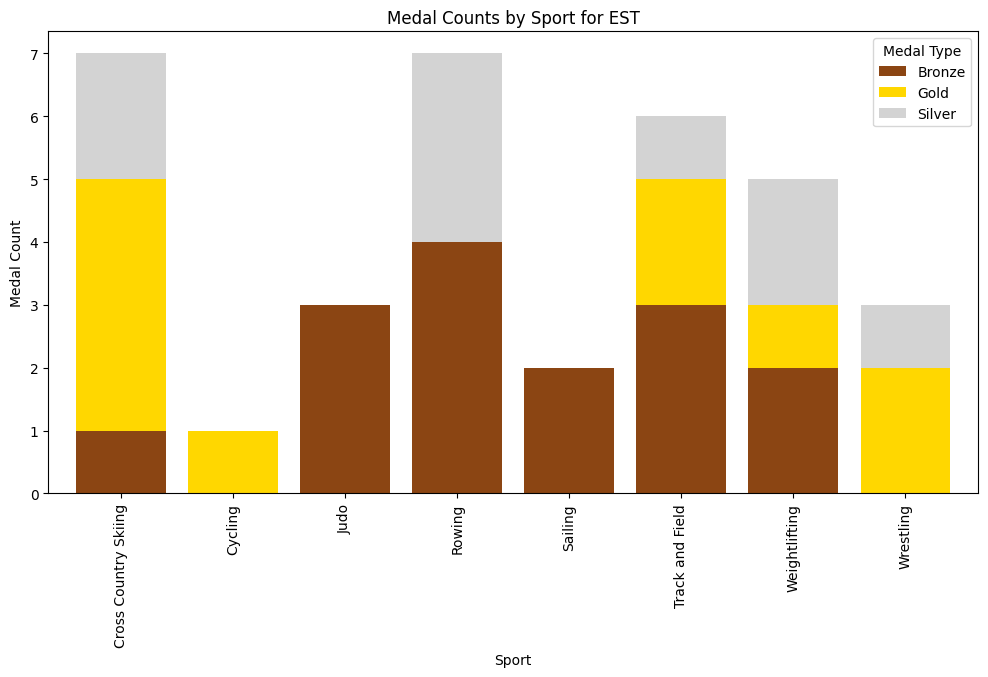

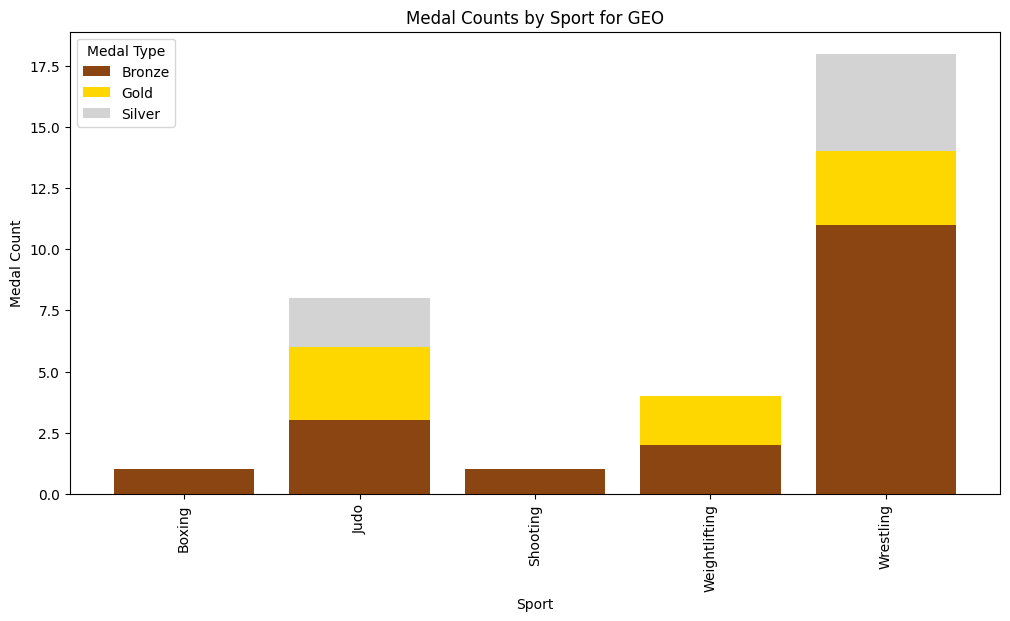

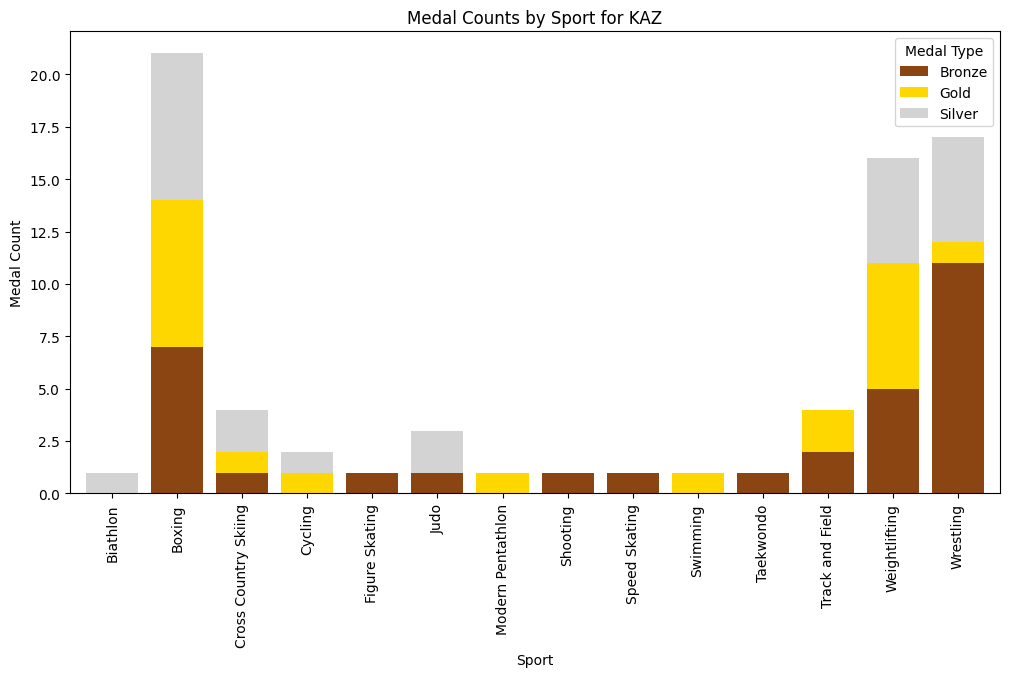

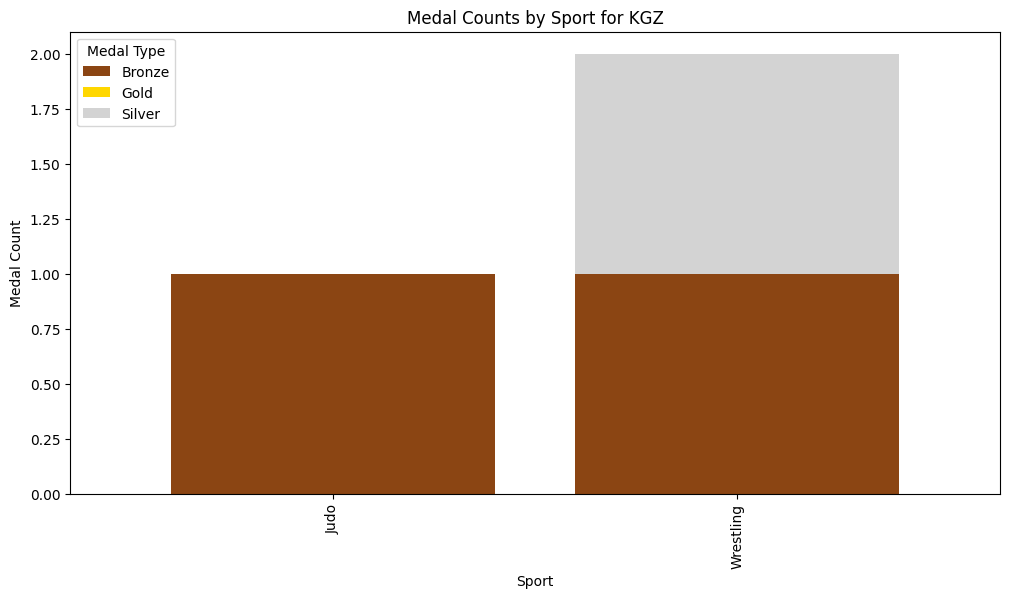

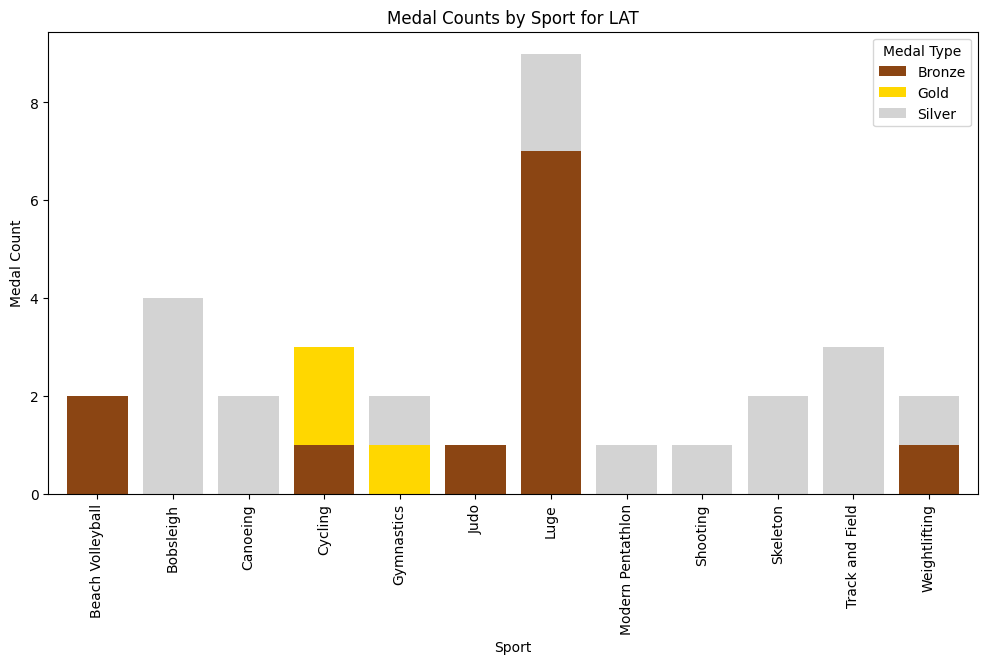

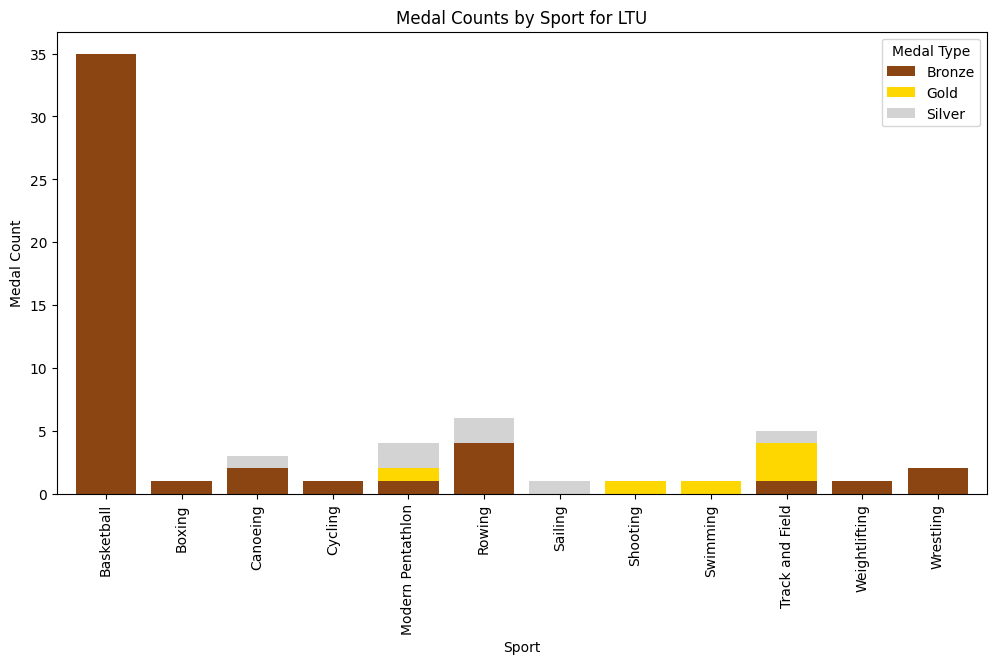

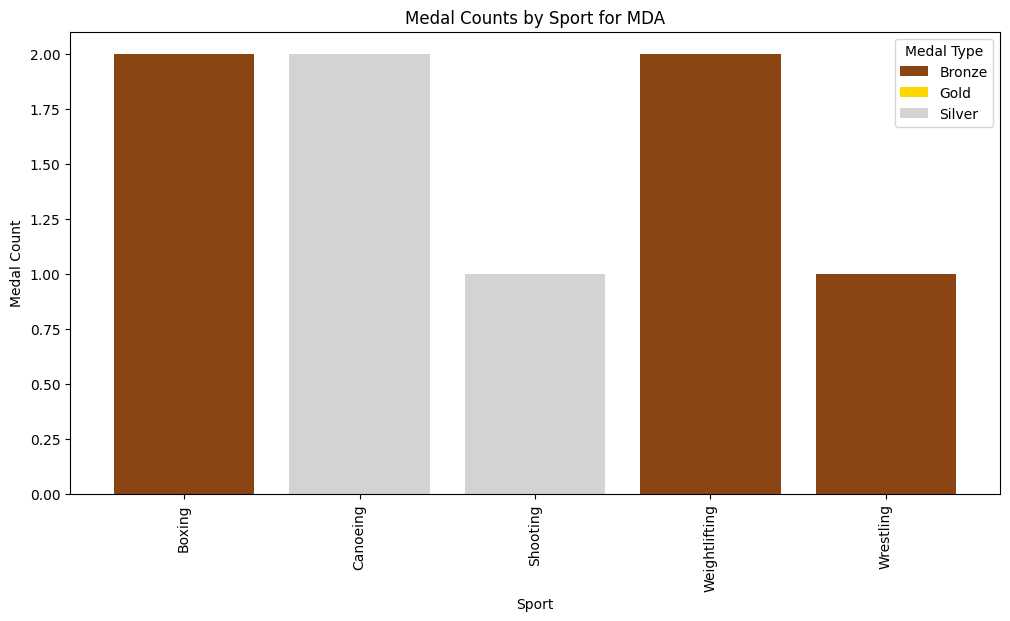

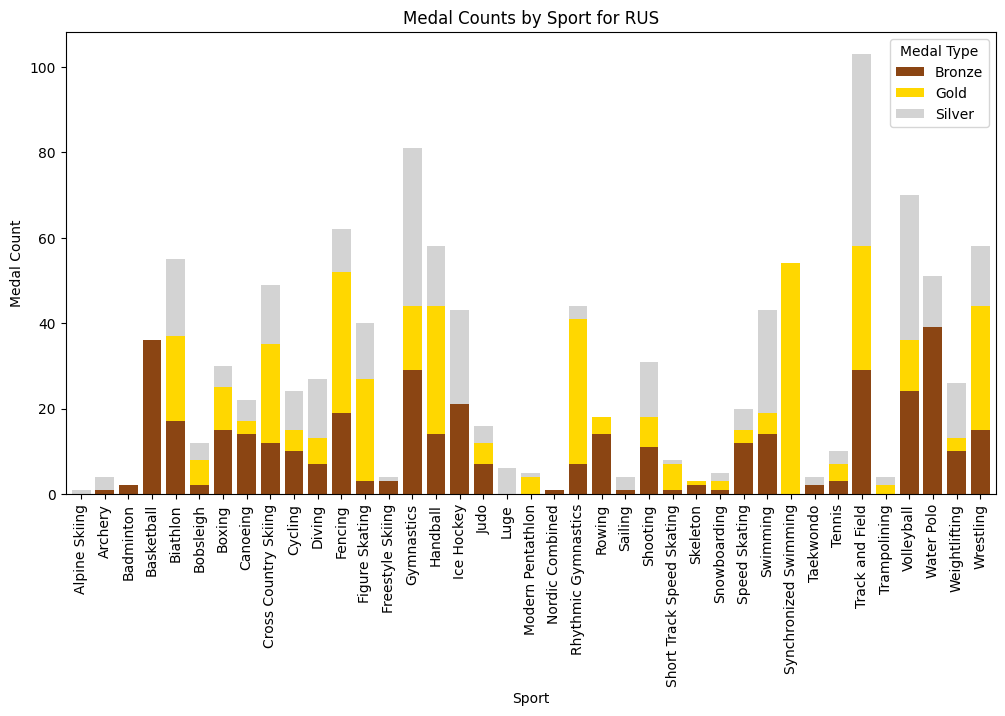

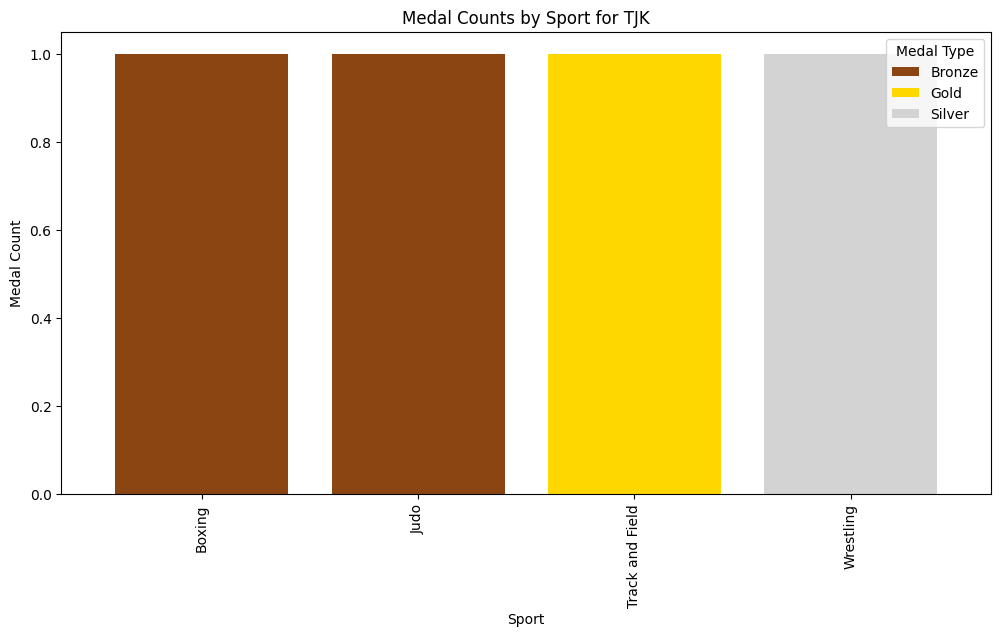

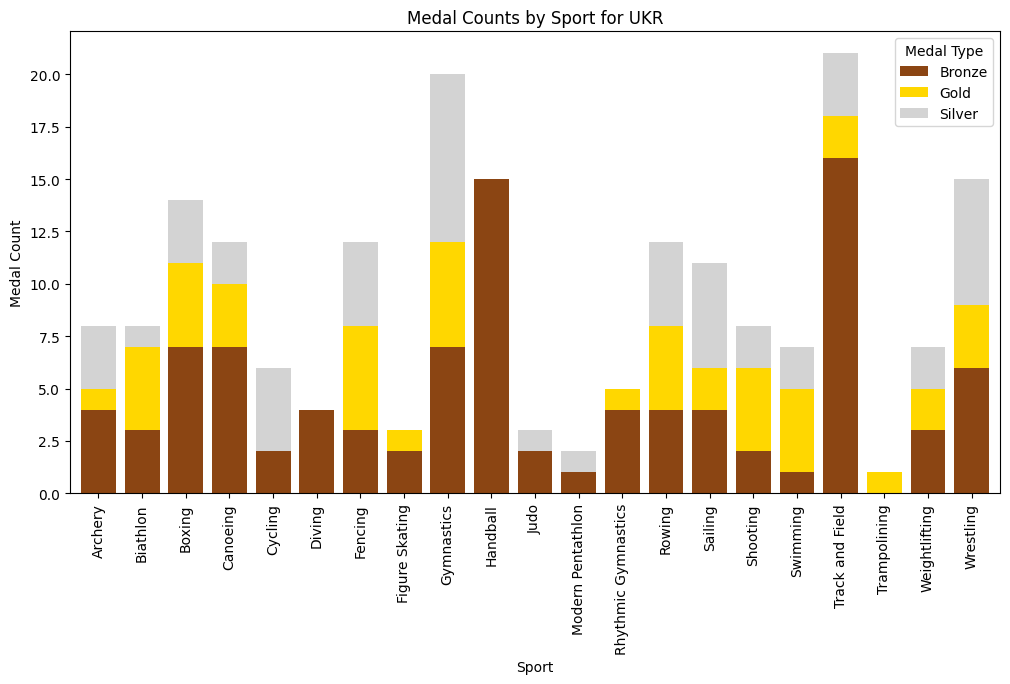

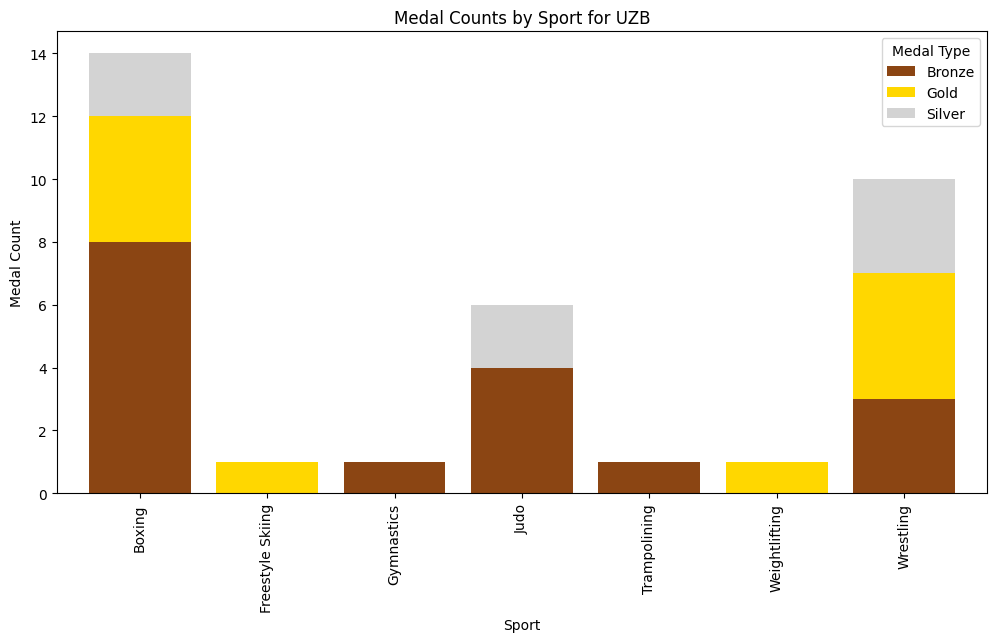

In [ ]:
# Filter the data for the former Soviet republics
soviet_nocs = ['ARM', 'AZE', 'BLR', 'EST', 'GEO', 'KAZ', 'KGZ', 'LAT', 'LTU', 'MDA', 'RUS', 'TJK', 'UKR', 'UZB']
soviet_df = df[df['NOC'].isin(soviet_nocs)]

# Group the data by NOC and Sport
grouped = soviet_df.groupby(['NOC', 'Sport', 'Medal'])['Name'].count().reset_index()

# Pivot the data to create a table of medal counts by NOC and Sport
pivoted = pd.pivot_table(grouped, values='Name', index=['NOC', 'Sport'], columns='Medal', aggfunc='sum', fill_value=0)

# Drop sports with no medals
pivoted = pivoted.loc[pivoted.sum(axis=1) != 0]

medal_colors = {'Bronze': 'saddlebrown', 'Silver': 'lightgrey', 'Gold': 'gold'}


# Loop through each NOC and create a stacked bar chart of the medal counts for each sport
for noc in pivoted.index.get_level_values('NOC').unique():
    noc_df = pivoted.loc[noc]
    noc_df.plot(kind='bar', stacked=True, figsize=(12,6), width=0.8, color=medal_colors)
    
    # Add labels and title
    plt.xlabel('Sport')
    plt.ylabel('Medal Count')
    plt.title(f'Medal Counts by Sport for {noc}')
    plt.legend(title='Medal Type')
    
    # Show the plot
    plt.show()

Our final analysis is a set of graphs representing the individual countries of the Soviet Union's performance per sport. Like the treemap, this gives us a deeper insight into how each country performed. It is interesting to see how each country performed differently at the events. For example, Belarus has won medals from a wide variety of events, while countries like Armenia have medals in only a couple of events. Analysis these plots gives us a deeper insight in the Soviet Union's performance at the Olympic Games.

## Conclusions

From this project, we learned a great deal about both the data analyzed as well as the process of cleaning and organizing data. Through completing this project, our group was given the oppuritnunity to display the skills learned in this class on a real-world apllicacatiopn. To analyze the data, we used popular plotting modules such as matplotlib and seaborn. To organize our data, we used a pandas database as it provided our group with an easy way to structure our data. Pandas databases also work very well with other modules such as the matplotlib module. 

Through this project, we also learned many interesting relationships in our data. Analyzing data from the Olympic Games revealed many correlations and datapoints that many people might not know. It was interesting to see the effect the real world events had on the Olympic Games and how it affected a country's medal count. It was also intersting to find out how an atheltes height and weight affects the event that they might play. Given an atheletes sex, height, and weight, our group could analyze our data to determine thier most probable events. This is a great example of the power that data analysis has on our world. 

It was also interstitng to explore the Soviet Union's impact on the Olympic Games. During its existance, the Soviet Union impacted the games in a large way. The Soviet Union earned many medals in a wide variety of events. This effect can be seen even today as the Soviet Union is still considered a top medal earner in the Olympics. Analyzing data such as this is a great way to learn more about history and the relationships between various datapoints.